# Results Visualisation 
---


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from annex_new import import_
from annex_new import get_ellipticity
from annex_new import get_bh_errors
from annex_new import get_sep_errors
from annex_new import get_elli_errors
from annex_new import count_per_bin
from annex_new import get_bh_results
from annex_new import get_sep_results

### Path

In [4]:
"""Check the folders hierarchy"""
from os.path import expanduser
user_home = expanduser("~")
path = user_home+'/Documents/Cosmostat/Codes/BlendHunter'

# IMPORT DATA

In [ ]:
""""Retrieve results for non padded images """
bh_results = get_bh_results(path_bh_results = path+'/bh_results')
sep_results = get_sep_results(path_sep_results = path+'/sep_results')

"""Retrieve ellipticity components"""
e1_total= get_ellipticity(path, get_e1=True)
e2_total= get_ellipticity(path, get_e2=True)

"""Retrieve missed blends for sep and bh"""
bh_errors = [[get_bh_errors(results=bh_results[i][j]) for j in range(len(bh_results[i]))] for i in range(len(bh_results))]

sep_errors = [[get_sep_errors(results=sep_results[i][j]) for j in range(len(sep_results[i]))] for i in range(len(sep_results))]

"""For each noise realisation and each noise level, retrieve the components corresponding to the missed blends"""

e1_errors_bh = [[get_elli_errors(e1_total, errors = bh_errors[i][j]) for j in range(len(bh_errors[i]))] for i in range(len(bh_errors))]
e1_errors_sep = [[get_elli_errors(e1_total, errors = sep_errors[i][j]) for j in range(len(sep_errors[i]))] for i in range(len(sep_errors))]

e2_errors_bh = [[get_elli_errors(e2_total, errors = bh_errors[i][j]) for j in range(len(bh_errors[i]))] for i in range(len(bh_errors))]
e2_errors_sep = [[get_elli_errors(e2_total, errors = sep_errors[i][j]) for j in range(len(sep_errors[i]))] for i in range(len(sep_errors))]


In [ ]:
"""Get e1,e2 for missed blends by bh and sep"""
def get_e1_errors(e1=None, errors=None):
    return [e1[i] for i in errors]

def get_e2_errors(e2=None, errors=None):
    return [e2[i] for i in errors]


"""How to retrieve informations from each bin in total dataset"""
def count_per_bin(data =None, get_bins =False, bins_=int(180/3)):
    (n, bins, patches) = plt.hist(data, bins = bins_)
    if get_bins:
        return n, bins[1:], bins
    else:
        return n
    
"""Computation of error ratios"""
def acc_ratio_bins(data=None, N=None, bins=int(180/3)):
    """N being the total obs per bin"""
    n = count_per_bin(data, bins_=bins)
    ratio = 1 - (n/N)   
    return ratio

"""Compute mean accuracy for each noise level """
def get_mean_acc(data=None, data_total=None, nb_ratios=23, get_mean_total=False):
    
    if get_mean_total:
        #Get total number per bin and mean distance per bin for the whole test set
        n_total, mean_dist, bin_edges = count_per_bin(data=data_total, get_bins=True)  
        return mean_dist
    else:
        """Get total number per bin and mean distance per bin for the whole test set"""
        n_total, mean_dist, bin_edges = count_per_bin(data=data_total, get_bins=True)  
        
        """Compute accuracy ratio for each bin, for each noise realisation and noise level"""
        acc_ratios = [[acc_ratio_bins(x[j], N= n_total , bins=bin_edges) for j in range(len(x))] for x in data]
        
        """For each noise level, create sub_lists of accuracy ratios for corresponding bins but with all noise realisations"""
        sub_ratios = [[np.array([acc_ratios[k][i][j] for i in range(len(acc_ratios[k]))]) for j in range(nb_ratios)] for k in                                   range(len(acc_ratios))]
        """Compute the mean on each sub_list.
        The function returns the mean accuracy ratios for each noise level"""

        return [np.array([np.mean(k[i]) for i in range(len(k))]) for k in sub_ratios]

In [ ]:
"""Retrieve the mean e1, e2 per bin for x axis"""
mean_e1_per_bin = get_mean_acc(get_mean_total=True, data_total=e1_total)
mean_e2_per_bin = get_mean_acc(get_mean_total=True, data_total=e2_total)

"""Compute the mean accuracy ratio (on all noise realisations) for each bin and each noise level"""
mean_acc_bh_e1 = get_mean_acc(data=e1_errors_bh, data_total=e1_total, nb_ratios = 23)
mean_acc_sep_e1 = get_mean_acc(data=e1_errors_sep, data_total=e1_total, nb_ratios = 23)

mean_acc_bh_e2 = get_mean_acc(data=e2_errors_bh, data_total=e2_total, nb_ratios = 23)
mean_acc_sep_e2 = get_mean_acc(data=e2_errors_sep, data_total=e2_total, nb_ratios = 23)

## PLOT ACCURACY ACCORDING TO $e1, e2$

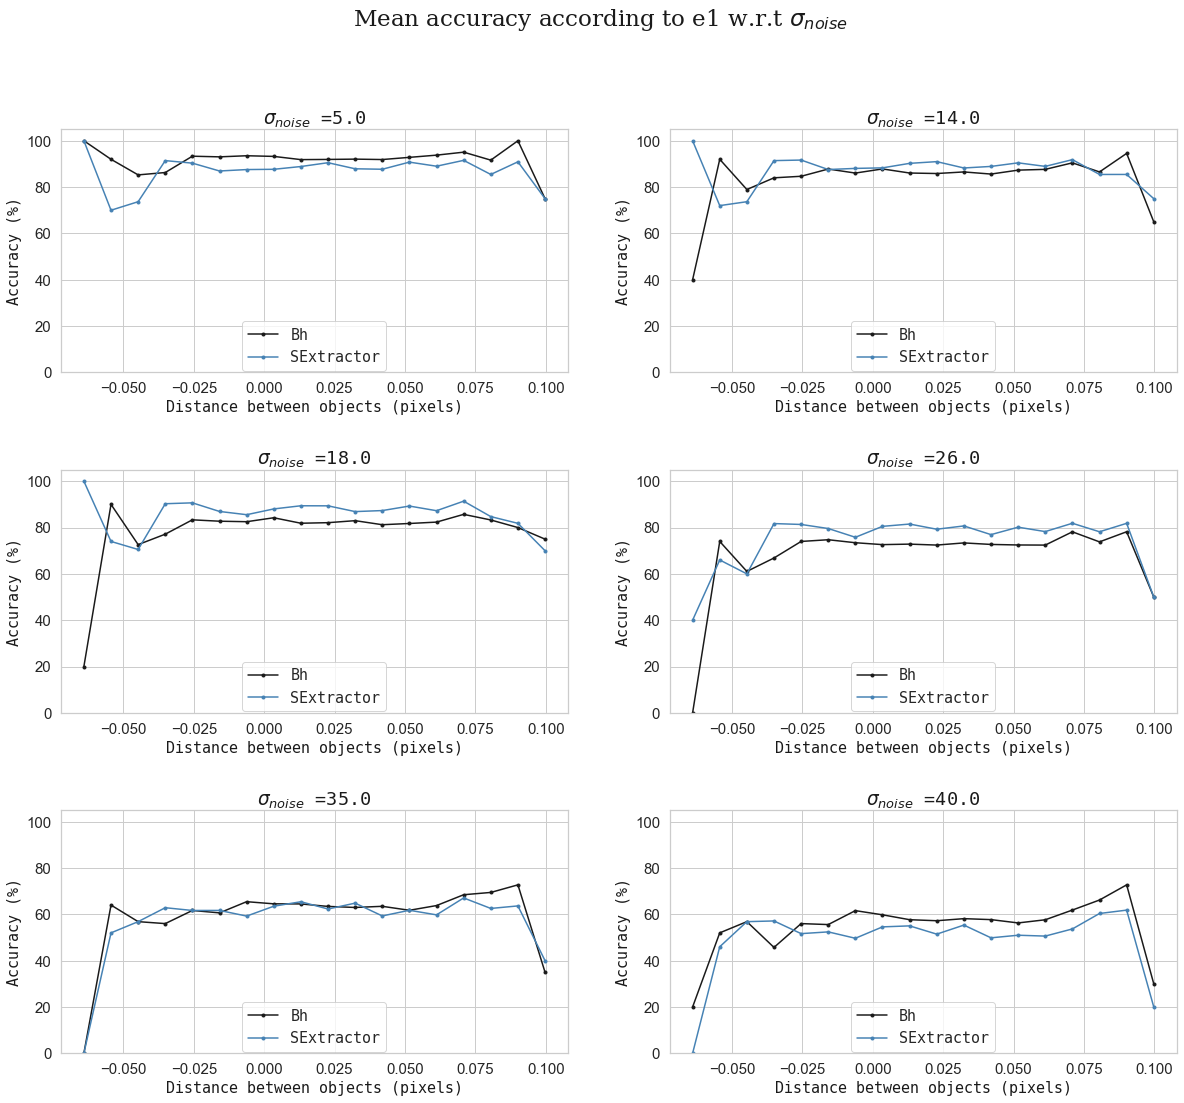

In [35]:
#Seaborn theme
sns.set(context='notebook', style='whitegrid', palette='deep')
#Font dictionnary
font = {'family': 'monospace',
        'color':  'k',
        'weight': 'normal',
        'size': 15}
#Start plot
fig, ax = plt.subplots(3,2,figsize=(20,17), sharex=False)
#Title
fig.suptitle('Mean accuracy according to e1 w.r.t $\sigma_{noise}$', 
             fontdict = {'family': 'serif','color':  'k','weight': 'heavy','size': 23}, fontsize=23)
#First subplot 
ax[0,0].set_title('$\sigma_{noise}$ =5.0', fontdict=font, fontsize=18.5)
ax[0,0].plot(mean_e1, 100*mean_acc_bh_e1[0], color = 'k', marker='.', label='Bh')
ax[0,0].plot(mean_e1, 100*mean_acc_sep_e1[0], color = 'steelblue', marker='.', label='SExtractor')
ax[0,0].set_ylabel('Accuracy (%)', fontdict = font)
ax[0,0].set_xlabel('e1', fontdict = font)
ax[0,0].set_ylim(0,105)
ax[0,0].tick_params(axis='both', which='major', labelsize=15)
ax[0,0].legend(borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})

#Second subplot 
ax[0,1].set_title('$\sigma_{noise}$ =14.0', fontdict=font, fontsize=18.5)
ax[0,1].plot(mean_e1, 100*mean_acc_bh_e1[1], color = 'k', marker='.', label='Bh')
ax[0,1].plot(mean_e1, 100*mean_acc_sep_e1[1], color = 'steelblue', marker='.', label='SExtractor')
ax[0,1].set_ylabel('Accuracy (%)', fontdict = font)
ax[0,1].set_xlabel('e1', fontdict = font)
ax[0,1].set_ylim(0,105)
ax[0,1].tick_params(axis='both', which='major', labelsize=15)
ax[0,1].legend(borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})

#3rd subplot 
ax[1,0].set_title('$\sigma_{noise}$ =18.0', fontdict=font, fontsize=18.5)
ax[1,0].plot(mean_e1, 100*mean_acc_bh_e1[2], color = 'k', marker='.', label='Bh')
ax[1,0].plot(mean_e1, 100*mean_acc_sep_e1[2], color = 'steelblue', marker='.', label='SExtractor')
ax[1,0].set_ylabel('Accuracy (%)', fontdict = font)
ax[1,0].set_xlabel('e1', fontdict = font)
ax[1,0].set_ylim(0,105)
ax[1,0].tick_params(axis='both', which='major', labelsize=15)
ax[1,0].legend(borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})

#4th subplot 
ax[1,1].set_title('$\sigma_{noise}$ =26.0', fontdict=font, fontsize=18.5)
ax[1,1].plot(mean_e1, 100*mean_acc_bh_e1[3], color = 'k', marker='.', label='Bh')
ax[1,1].plot(mean_e1, 100*mean_acc_sep_e1[3], color = 'steelblue', marker='.', label='SExtractor')
ax[1,1].set_ylabel('Accuracy (%)', fontdict = font)
ax[1,1].set_xlabel('e1', fontdict = font)
ax[1,1].set_ylim(0,105)
ax[1,1].tick_params(axis='both', which='major', labelsize=15)
ax[1,1].legend(borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})

#5th subplot 
ax[2,0].set_title('$\sigma_{noise}$ =35.0', fontdict=font, fontsize=18.5)
ax[2,0].plot(mean_e1, 100*mean_acc_bh_e1[4],color = 'k', marker='.', label='Bh')
ax[2,0].plot(mean_e1, 100*mean_acc_sep_e1[4], color = 'steelblue', marker='.', label='SExtractor')
ax[2,0].set_ylabel('Accuracy (%)', fontdict = font)
ax[2,0].set_xlabel('e1', fontdict = font)
ax[2,0].set_ylim(0,105)
ax[2,0].tick_params(axis='both', which='major', labelsize=15)
ax[2,0].legend(borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})

#6th subplot 
ax[2,1].set_title('$\sigma_{noise}$ =40.0', fontdict=font, fontsize=18.5)
x=ax[2,1].plot(mean_e1, 100*mean_acc_bh_e1[5], color = 'k', marker='.', label='Bh')
y=ax[2,1].plot(mean_e1, 100*mean_acc_sep_e1[5], color = 'steelblue', marker='.', label='SExtractor')
ax[2,1].set_ylabel('Accuracy (%)', fontdict = font)
ax[2,1].set_xlabel('e1', fontdict = font)
ax[2,1].set_ylim(0,105)
ax[2,1].tick_params(axis='both', which='major', labelsize=15)
ax[2,1].legend(borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})

#Add legend
#labels_legend=["Bh", 'SExtractor', 'Gain on SExtractor']
plt.subplots_adjust(hspace=0.4)
#fig.legend([x,y,z], labels=labels_legend, borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})
plt.show()

In [ ]:
#Seaborn theme
sns.set(context='notebook', style='whitegrid', palette='deep')
#Font dictionnary
font = {'family': 'monospace',
        'color':  'k',
        'weight': 'normal',
        'size': 15}
#Start plot
fig, ax = plt.subplots(3,2,figsize=(20,17), sharex=False)
#Title
fig.suptitle('Mean accuracy according to e1 w.r.t $\sigma_{noise}$', 
             fontdict = {'family': 'serif','color':  'k','weight': 'heavy','size': 23}, fontsize=23)
#First subplot 
ax[0,0].set_title('$\sigma_{noise}$ =5.0', fontdict=font, fontsize=18.5)
ax[0,0].plot(mean_e2, 100*mean_acc_bh_e2[0], color = 'k', marker='.', label='Bh')
ax[0,0].plot(mean_e2, 100*mean_acc_sep_e2[0], color = 'steelblue', marker='.', label='SExtractor')
ax[0,0].set_ylabel('Accuracy (%)', fontdict = font)
ax[0,0].set_xlabel('e2', fontdict = font)
ax[0,0].set_ylim(0,105)
ax[0,0].tick_params(axis='both', which='major', labelsize=15)
ax[0,0].legend(borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})

#Second subplot 
ax[0,1].set_title('$\sigma_{noise}$ =14.0', fontdict=font, fontsize=18.5)
ax[0,1].plot(mean_e2, 100*mean_acc_bh_e2[1], color = 'k', marker='.', label='Bh')
ax[0,1].plot(mean_e2, 100*mean_acc_sep_e2[1], color = 'steelblue', marker='.', label='SExtractor')
ax[0,1].set_ylabel('Accuracy (%)', fontdict = font)
ax[0,1].set_xlabel('e2', fontdict = font)
ax[0,1].set_ylim(0,105)
ax[0,1].tick_params(axis='both', which='major', labelsize=15)
ax[0,1].legend(borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})

#3rd subplot 
ax[1,0].set_title('$\sigma_{noise}$ =18.0', fontdict=font, fontsize=18.5)
ax[1,0].plot(mean_e2, 100*mean_acc_bh_e2[2], color = 'k', marker='.', label='Bh')
ax[1,0].plot(mean_e2, 100*mean_acc_sep_e2[2], color = 'steelblue', marker='.', label='SExtractor')
ax[1,0].set_ylabel('Accuracy (%)', fontdict = font)
ax[1,0].set_xlabel('e2', fontdict = font)
ax[1,0].set_ylim(0,105)
ax[1,0].tick_params(axis='both', which='major', labelsize=15)
ax[1,0].legend(borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})

#4th subplot 
ax[1,1].set_title('$\sigma_{noise}$ =26.0', fontdict=font, fontsize=18.5)
ax[1,1].plot(mean_e2, 100*mean_acc_bh_e2[3], color = 'k', marker='.', label='Bh')
ax[1,1].plot(mean_e2, 100*mean_acc_sep_e2[3], color = 'steelblue', marker='.', label='SExtractor')
ax[1,1].set_ylabel('Accuracy (%)', fontdict = font)
ax[1,1].set_xlabel('e2', fontdict = font)
ax[1,1].set_ylim(0,105)
ax[1,1].tick_params(axis='both', which='major', labelsize=15)
ax[1,1].legend(borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})

#5th subplot 
ax[2,0].set_title('$\sigma_{noise}$ =35.0', fontdict=font, fontsize=18.5)
ax[2,0].plot(mean_e1, 100*mean_acc_bh_e2[4],color = 'k', marker='.', label='Bh')
ax[2,0].plot(mean_e1, 100*mean_acc_sep_e2[4], color = 'steelblue', marker='.', label='SExtractor')
ax[2,0].set_ylabel('Accuracy (%)', fontdict = font)
ax[2,0].set_xlabel('e2', fontdict = font)
ax[2,0].set_ylim(0,105)
ax[2,0].tick_params(axis='both', which='major', labelsize=15)
ax[2,0].legend(borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})

#6th subplot 
ax[2,1].set_title('$\sigma_{noise}$ =40.0', fontdict=font, fontsize=18.5)
x=ax[2,1].plot(mean_e1, 100*mean_acc_bh_e2[5], color = 'k', marker='.', label='Bh')
y=ax[2,1].plot(mean_e1, 100*mean_acc_sep_e2[5], color = 'steelblue', marker='.', label='SExtractor')
ax[2,1].set_ylabel('Accuracy (%)', fontdict = font)
ax[2,1].set_xlabel('e2', fontdict = font)
ax[2,1].set_ylim(0,105)
ax[2,1].tick_params(axis='both', which='major', labelsize=15)
ax[2,1].legend(borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})

#Add legend
#labels_legend=["Bh", 'SExtractor', 'Gain on SExtractor']
plt.subplots_adjust(hspace=0.4)
#fig.legend([x,y,z], labels=labels_legend, borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})
plt.show()

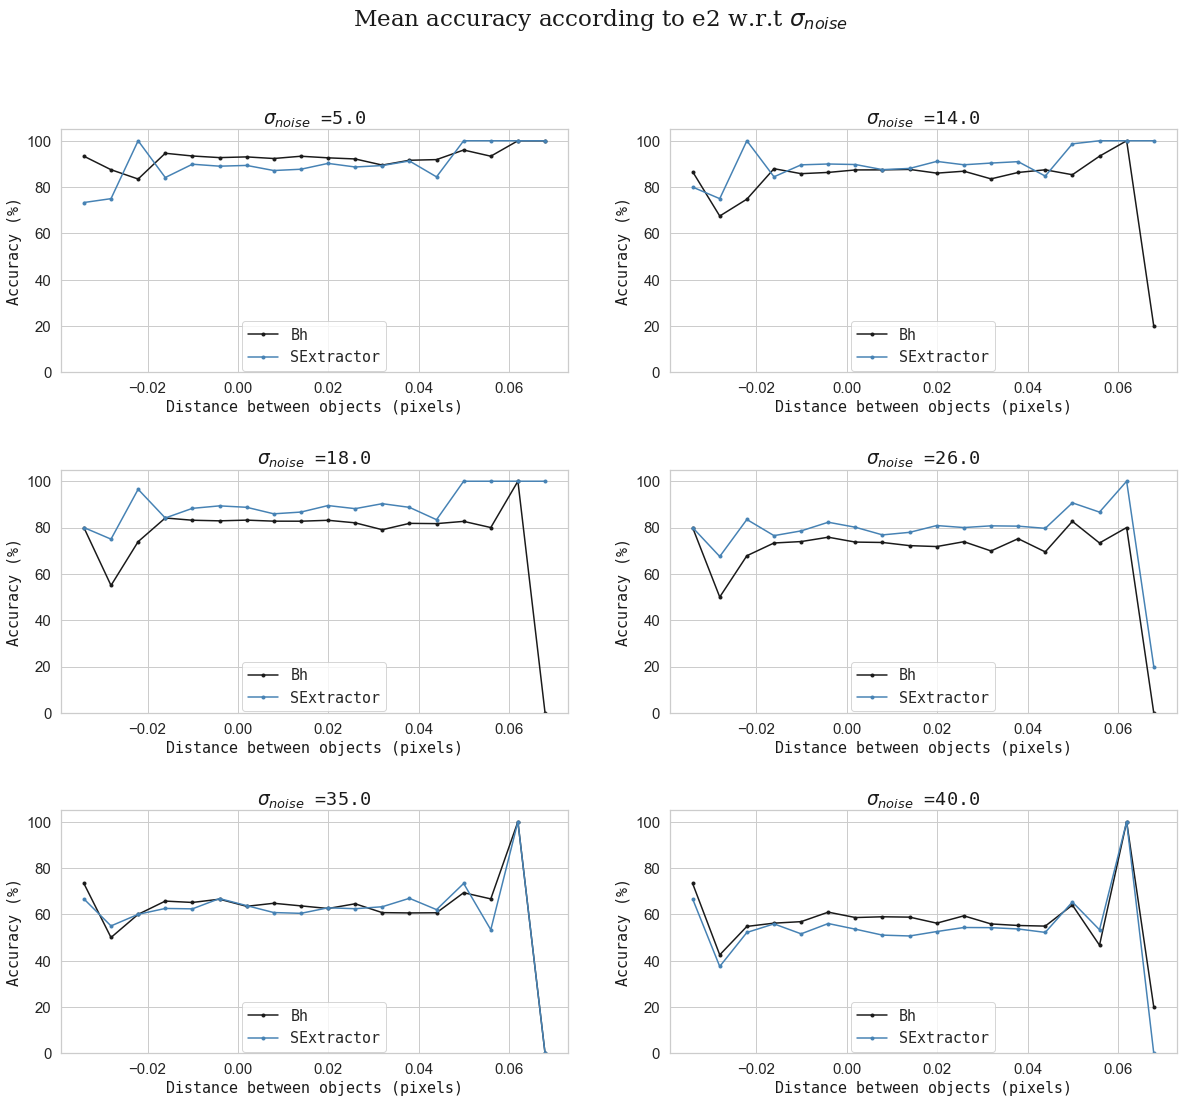

In [34]:
#Seaborn theme
sns.set(context='notebook', style='whitegrid', palette='deep')
#Font dictionnary
font = {'family': 'monospace',
        'color':  'k',
        'weight': 'normal',
        'size': 15}
#Start plot
fig, ax = plt.subplots(3,2,figsize=(20,17), sharex=False)
#Title
fig.suptitle('Mean accuracy according to e2 w.r.t $\sigma_{noise}$', 
             fontdict = {'family': 'serif','color':  'k','weight': 'heavy','size': 23}, fontsize=23)
#First subplot 
ax[0,0].set_title('$\sigma_{noise}$ =5.0', fontdict=font, fontsize=18.5)
ax[0,0].plot(mean_e2, 100*(1-mean_ratios_e2[0]), color = 'k', marker='.', label='Bh')
ax[0,0].plot(mean_e2, 100*(1-mean_ratios_e2_sep[0]), color = 'steelblue', marker='.', label='SExtractor')
ax[0,0].set_ylabel('Accuracy (%)', fontdict = font)
ax[0,0].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[0,0].set_ylim(0,105)
ax[0,0].tick_params(axis='both', which='major', labelsize=15)
ax[0,0].legend(borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})

#Second subplot 
ax[0,1].set_title('$\sigma_{noise}$ =14.0', fontdict=font, fontsize=18.5)
ax[0,1].plot(mean_e2, 100*(1-mean_ratios_e2[1]), color = 'k', marker='.', label='Bh')
ax[0,1].plot(mean_e2, 100*(1-mean_ratios_e2_sep[1]), color = 'steelblue', marker='.', label='SExtractor')
ax[0,1].set_ylabel('Accuracy (%)', fontdict = font)
ax[0,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[0,1].set_ylim(0,105)
ax[0,1].tick_params(axis='both', which='major', labelsize=15)
ax[0,1].legend(borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})

#3rd subplot 
ax[1,0].set_title('$\sigma_{noise}$ =18.0', fontdict=font, fontsize=18.5)
ax[1,0].plot(mean_e2, 100*(1-mean_ratios_e2[2]), color = 'k', marker='.', label='Bh')
ax[1,0].plot(mean_e2, 100*(1-mean_ratios_e2_sep[2]), color = 'steelblue', marker='.', label='SExtractor')
ax[1,0].set_ylabel('Accuracy (%)', fontdict = font)
ax[1,0].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[1,0].set_ylim(0,105)
ax[1,0].tick_params(axis='both', which='major', labelsize=15)
ax[1,0].legend(borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})

#4th subplot 
ax[1,1].set_title('$\sigma_{noise}$ =26.0', fontdict=font, fontsize=18.5)
ax[1,1].plot(mean_e2, 100*(1-mean_ratios_e2[3]), color = 'k', marker='.', label='Bh')
ax[1,1].plot(mean_e2, 100*(1-mean_ratios_e2_sep[3]), color = 'steelblue', marker='.', label='SExtractor')
ax[1,1].set_ylabel('Accuracy (%)', fontdict = font)
ax[1,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[1,1].set_ylim(0,105)
ax[1,1].tick_params(axis='both', which='major', labelsize=15)
ax[1,1].legend(borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})

#5th subplot 
ax[2,0].set_title('$\sigma_{noise}$ =35.0', fontdict=font, fontsize=18.5)
ax[2,0].plot(mean_e2, 100*(1-mean_ratios_e2[4]),color = 'k', marker='.', label='Bh')
ax[2,0].plot(mean_e2, 100*(1-mean_ratios_e2_sep[4]), color = 'steelblue', marker='.', label='SExtractor')
ax[2,0].set_ylabel('Accuracy (%)', fontdict = font)
ax[2,0].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[2,0].set_ylim(0,105)
ax[2,0].tick_params(axis='both', which='major', labelsize=15)
ax[2,0].legend(borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})

#6th subplot 
ax[2,1].set_title('$\sigma_{noise}$ =40.0', fontdict=font, fontsize=18.5)
x=ax[2,1].plot(mean_e2, 100*(1-mean_ratios_e2[5]), color = 'k', marker='.', label='Bh')
y=ax[2,1].plot(mean_e2, 100*(1-mean_ratios_e2_sep[5]), color = 'steelblue', marker='.', label='SExtractor')
ax[2,1].set_ylabel('Accuracy (%)', fontdict = font)
ax[2,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[2,1].set_ylim(0,105)
ax[2,1].tick_params(axis='both', which='major', labelsize=15)
ax[2,1].legend(borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})

#Add legend
plt.subplots_adjust(hspace=0.4)
plt.show()